In [ ]:
# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [61]:
df['Product Category']

0           Beauty
1         Clothing
2      Electronics
3         Clothing
4           Beauty
          ...     
995       Clothing
996         Beauty
997         Beauty
998    Electronics
999    Electronics
Name: Product Category, Length: 1000, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [7]:
 # Count missing values in each column
missing_count = df.isna().sum()
missing_count

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
# Check for duplicate records
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

 ## Univirate Analysis for Categorical columns

In [9]:
df['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [10]:
df['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [11]:
freq_table = df.groupby(['Product Category']).size().reset_index(name='count')
freq_table

,Product Category,count
0,Beauty,307
1,Clothing,351
2,Electronics,342


In [12]:
freq_table['Count%'] = freq_table['count']/sum(freq_table['count'])*100
freq_table

,Product Category,count,Count%
0,Beauty,307,30.7
1,Clothing,351,35.1
2,Electronics,342,34.2


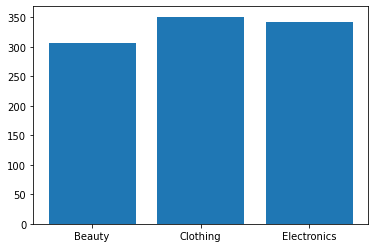

In [13]:
plt.bar(freq_table['Product Category'], freq_table['count'])
plt.show()

<AxesSubplot:>

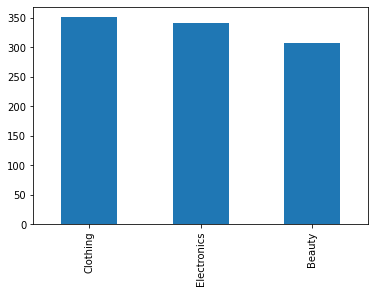

In [14]:
df['Product Category'].value_counts().plot(kind = 'bar')

 ## Numerical Variables

In [15]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


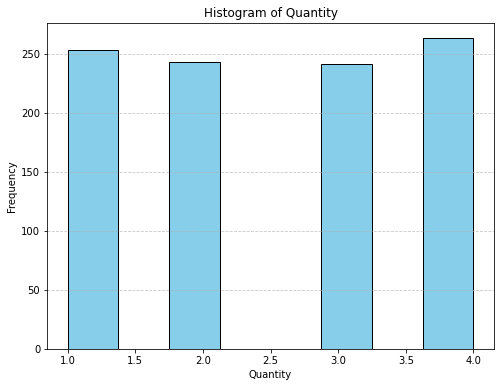

In [16]:
# Create a histogram for the 'Quantity' column
plt.figure(figsize=(8, 6))
plt.hist(df['Quantity'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

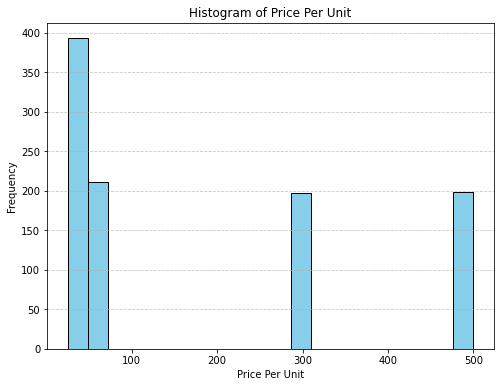

In [17]:
# Create a histogram for the 'Price per Unit' column

plt.figure(figsize=(8, 6))
plt.hist(df['Price per Unit'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Per Unit')
plt.xlabel('Price Per Unit')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

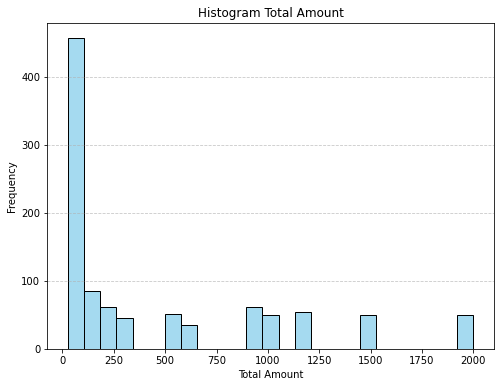

In [18]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Amount'], bins=25, color='skyblue', edgecolor='black')
plt.title('Histogram Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 # 1.How does customer age  influence their purchasing behavior?


In [29]:
 # Define age group boundaries
age_bins = [18, 25, 35, 45, 55, 65, 100]  # Define your age boundaries here
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]

In [30]:
# Create a new column 'Age Group' based on the age bins and labels
# right=False specifies that the bins are left-closed, meaning the lower bound is included in the bin
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
print(df[['Age', 'Age Group']].head(10))

   Age Age Group
0   34     26-35
1   26     26-35
2   50     46-55
3   37     36-45
4   30     26-35
5   45     46-55
6   46     46-55
7   30     26-35
8   63     56-65
9   52     46-55


In [31]:
 # Group the data by 'Age Group' and calculate the total quantity of products purchased
age_group_purchase = df.groupby('Age Group')['Quantity'].sum().reset_index()
age_group_purchase

,Age Group,Quantity
0,18-25,366
1,26-35,522
2,36-45,533
3,46-55,578
4,56-65,515
5,66+,0


In [32]:
# Sort the data by total quantity in descending order to find the age group that purchases the most products
age_group_purchase_sorted = age_group_purchase.sort_values(by='Quantity', ascending=False)
age_group_purchase_sorted

,Age Group,Quantity
3,46-55,578
2,36-45,533
1,26-35,522
4,56-65,515
0,18-25,366
5,66+,0


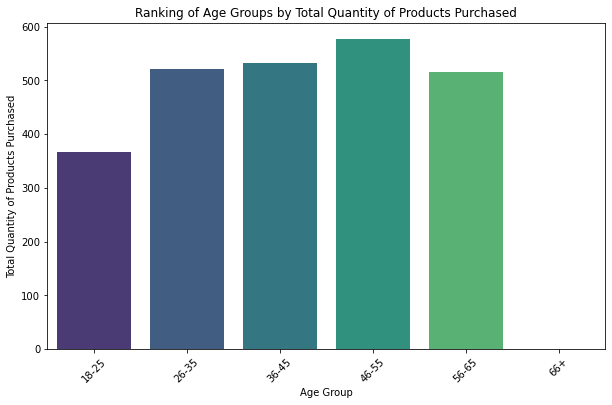

In [33]:
# Create a bar chart to rank age groups by total quantity of products purchased
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_purchase_sorted, x='Age Group', y='Quantity', palette='viridis')
plt.title('Ranking of Age Groups by Total Quantity of Products Purchased')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity of Products Purchased')
plt.xticks(rotation=45)
plt.show()

# Insights
Age Influence: Customers in the "46-55" age group tend to spend the most on average, followed by the "36-45" age group.
Recommendation
-Target marketing campaigns specifically to customer segments that exhibit higher spending.
-Tailor product offerings and promotions to align with the preferences of different age

 # 2.How does customer gender influence purchasing behavior ?

In [34]:
# Sum of Total Amount by gender
gender_purchase_sum = df.groupby('Gender')['Total Amount'].sum()
gender_purchase_sum


Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

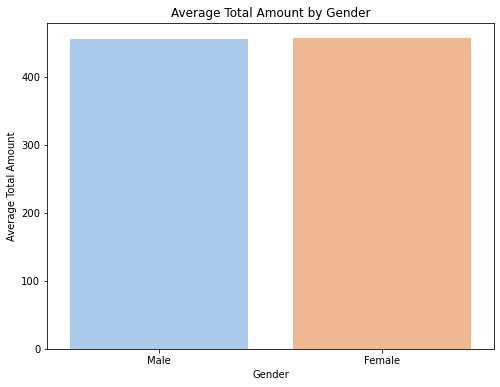

In [35]:
# Bar chart to compare average Total Amount by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Total Amount', ci=None, palette='pastel')#ci=None is used to turn off the display of confidence intervals in Seaborn's bar charts, making the chart cleaner and more focused on the main data points (e.g., mean values).
plt.title('Average Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Amount')
plt.show()

In [36]:
232840-223160

9680

Females tend to spend more than males.

# 1&2 How does customer age and gender influence their purchasing behavior?

In [37]:
df['Age'].max()

64

In [38]:
# Customer segmentation by age group
# Define age group boundaries
age_bins = [18, 25, 35, 45, 55, 65, 100]  # Define your age boundaries here
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]           

In [39]:
# Create a new column 'Age Group' based on the age bins and labels
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
print(df[['Age', 'Age Group']].head(10))

   Age Age Group
0   34     26-35
1   26     26-35
2   50     46-55
3   37     36-45
4   30     26-35
5   45     46-55
6   46     46-55
7   30     26-35
8   63     56-65
9   52     46-55


In [40]:
# Analyze purchasing behavior by age and gender
# unstack() transforms one level of the index into columns, making the data more tabular.
age_gender_purchase= df.groupby(['Age Group', 'Gender'])['Total Amount'].mean().unstack()
age_gender_purchase

Gender,Female,Male
Age Group,,
18-25,498.888889,502.987013
26-35,508.333333,447.920792
36-45,472.901786,461.789474
46-55,407.173913,458.272727
56-65,415.412844,419.719626
66+,NaN,NaN


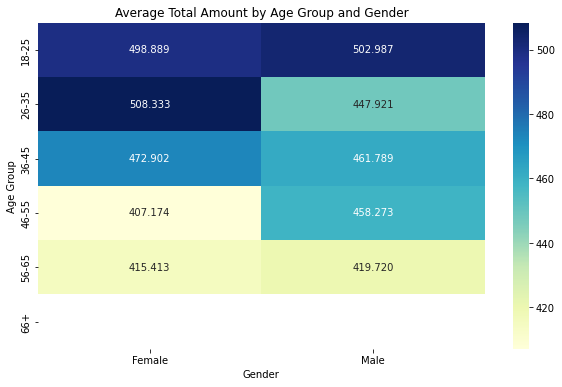

In [41]:
# Visualize purchasing behavior by age and gender
# annot=True-> dds numeric annotations (values) to the cells of the heatmap.
# fmt='.2f->  format of the annotations as floating-point numbers with two decimal places.
#cmap='YlGnBu'-> 'YlGnBu' is a color map that goes from yellow to green to blue, indicating low to high values 
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_purchase, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Average Total Amount by Age Group and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

  # **Insights
  *The "26-35" age group of females tends to have the highest average spending, while  "18-25" age group of males tends to have    the highest average spending.
**Conclusions
 * Target marketing campaigns specifically to customer segments that exhibit higher spending.
 * Tailor product offerings and promotions to align with the preferences of different age and gender groups.
 * Continuously monitor and analyze customer behavior to adapt strategies as needed.

# 2.Are there discernible patterns in sales across different time periods?

In [42]:
# Find the start date
start_date = df['Date'].min()

print("Start Date:", start_date)

Start Date: 2023-01-01 00:00:00


In [43]:
end_date = df['Date'].max()

print("end Date:", end_date)

end Date: 2024-01-01 00:00:00


In [44]:
# Generate sample data with sales ranging from 25 to 2000
np.random.seed(42)
num_points = 100
date_range = pd.date_range(start='2023-01-01', periods=num_points, freq='D')# freq='D'It means that the sequence of dates will be generated with a one-day interval between them.
total_sales = np.random.randint(25, 2001, size=num_points)


In [45]:
# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Total Amount': total_sales})
df

,Date,Total Amount
0,2023-01-01,1151
1,2023-01-02,1484
2,2023-01-03,885
3,2023-01-04,1319
4,2023-01-05,1155
...,...,...
95,2023-04-06,1820
96,2023-04-07,1870
97,2023-04-08,1525
98,2023-04-09,727


In [46]:
 # Extract additional time-related information
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

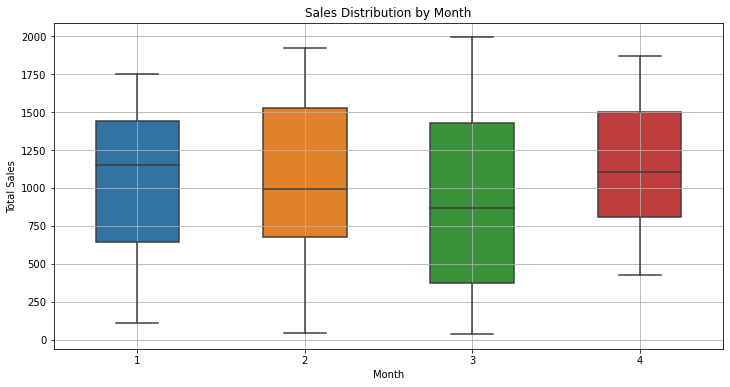

In [47]:
# Create a box  plot for sales by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Total Amount', width=0.5)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


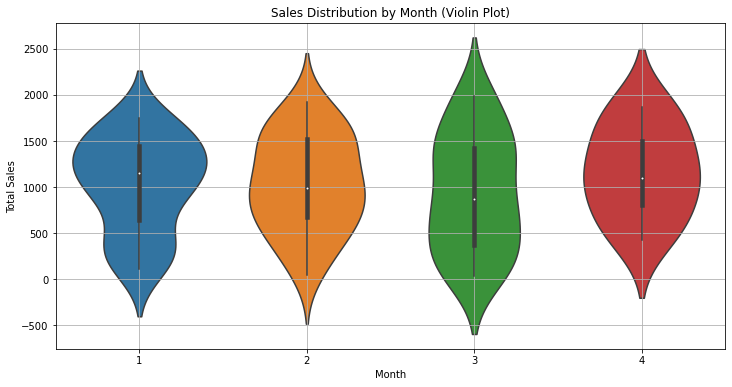

In [48]:
# Create a violin plot for sales by month
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Month', y='Total Amount')
plt.title('Sales Distribution by Month (Violin Plot)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [55]:
# Group the data by day of the week and calculate total sales for each month
day_of_week_sales = df.groupby('DayOfWeek')['Total Amount'].sum().reset_index()
day_of_week_sales

,DayOfWeek,Total Amount
0,Friday,11931
1,Monday,18011
2,Saturday,12975
3,Sunday,13175
4,Thursday,16960
5,Tuesday,11620
6,Wednesday,16699


In [50]:
# Group the data by month and calculate total sales for each month
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales

,Month,Total Amount
0,1,31793
1,2,29018
2,3,28914
3,4,11646


In [51]:
# Find the month(s) with the highest total sales
max_sales_month = monthly_sales[monthly_sales['Total Amount'] == monthly_sales['Total Amount'].max()]
max_sales_month

,Month,Total Amount
0,1,31793


In [52]:
# Find the month(s) with the least total sales
max_sales_month = monthly_sales[monthly_sales['Total Amount'] == monthly_sales['Total Amount'].min()]
max_sales_month

,Month,Total Amount
3,4,11646


In [53]:
# Find the day of week(s) with the highest total sales
day_of_week_sales =day_of_week_sales [day_of_week_sales['Total Amount'] == day_of_week_sales['Total Amount'].max()]
day_of_week_sales

,DayOfWeek,Total Amount
1,Monday,18011


In [56]:
# Find the day of week(s) with the least total sales
day_of_week_sales =day_of_week_sales [day_of_week_sales['Total Amount'] == day_of_week_sales['Total Amount'].min()]
day_of_week_sales

,DayOfWeek,Total Amount
5,Tuesday,11620


In [ ]:
# Insights
The best mont for sales was January while the best week of sales was monday

# 3.Which product categories hold the highest appeal among customers?

In [62]:
df['Product Category']

0           Beauty
1         Clothing
2      Electronics
3         Clothing
4           Beauty
          ...     
995       Clothing
996         Beauty
997         Beauty
998    Electronics
999    Electronics
Name: Product Category, Length: 1000, dtype: object

In [63]:
# Group the data by Product Category and sum the Quantity to find the total quantity sold per category
category_sales = df.groupby('Product Category')['Quantity'].sum()
category_sales

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

In [64]:
most_sold_category = category_sales.idxmax()
most_sold_category

'Clothing'

In [65]:
max_quantity_sold = category_sales.max()
max_quantity_sold

894

 # The product that sold most was clothing.

# 4.What are the relationships between age, spending, and product preferences?

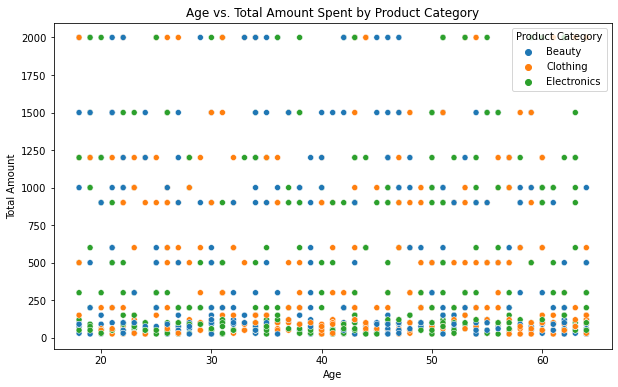

In [66]:
# Scatter plot of Age vs. Total Amount spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Total Amount", hue="Product Category")
plt.title("Age vs. Total Amount Spent by Product Category")
plt.show()

In [67]:
# Calculate Pearson's correlation coefficient between Age and Total Amount spent
correlation_coefficient = df["Age"].corr(df["Total Amount"])
correlation_coefficient

-0.060568023883045684

* The strength of the relationship is weak so its unlikely to be significant

In [149]:
# Calculate average Total Amount spent per age group for each product category
age_grouped = df.groupby(["Product Category", pd.cut(df["Age"], bins=[0, 20, 30, 40, 50, 60, 100])])["Total Amount"].mean().unstack()
age_grouped

Age,"(0, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 100]"
Product Category,,,,,,
Beauty,493.750000,463.835616,586.160714,501.439394,432.822581,194.230769
Clothing,453.437500,575.208333,452.898551,364.691358,437.375000,337.272727
Electronics,679.347826,352.923077,468.750000,421.081081,490.512821,501.323529


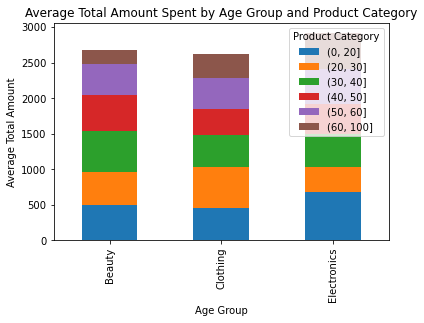

In [151]:
# Plot the results
age_grouped.plot(kind="bar", stacked=True)
plt.title("Average Total Amount Spent by Age Group and Product Category")
plt.xlabel("Age Group")
plt.ylabel("Average Total Amount")
plt.legend(title="Product Category")
plt.show()

 # Age 0-20 are the ones who spend most and its spent on electronics as young adults tend to be more tech savvy.